In [38]:
import psycopg2
import random
import string
import matplotlib.pyplot as plt
import pandas as pd
connection = psycopg2.connect(dbname="pg_db", host="localhost",
                 user="postgres", password="postgres",
                 port="5432")
cursor = connection.cursor()

In [39]:
frame = pd.read_sql_query(''' with am as(
  select count(*) as sum
  from project.sights
)
select country, count(*) * 100.0 / max(am.sum) as percentage
from project.location , am
group by country
order by percentage
limit 25
''',con=connection)

/tmp/ipykernel_15606/3763684767.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frame = pd.read_sql_query(''' with am as(


Text(0.5, 1.0, 'Распределение достопримечательностей по странам')

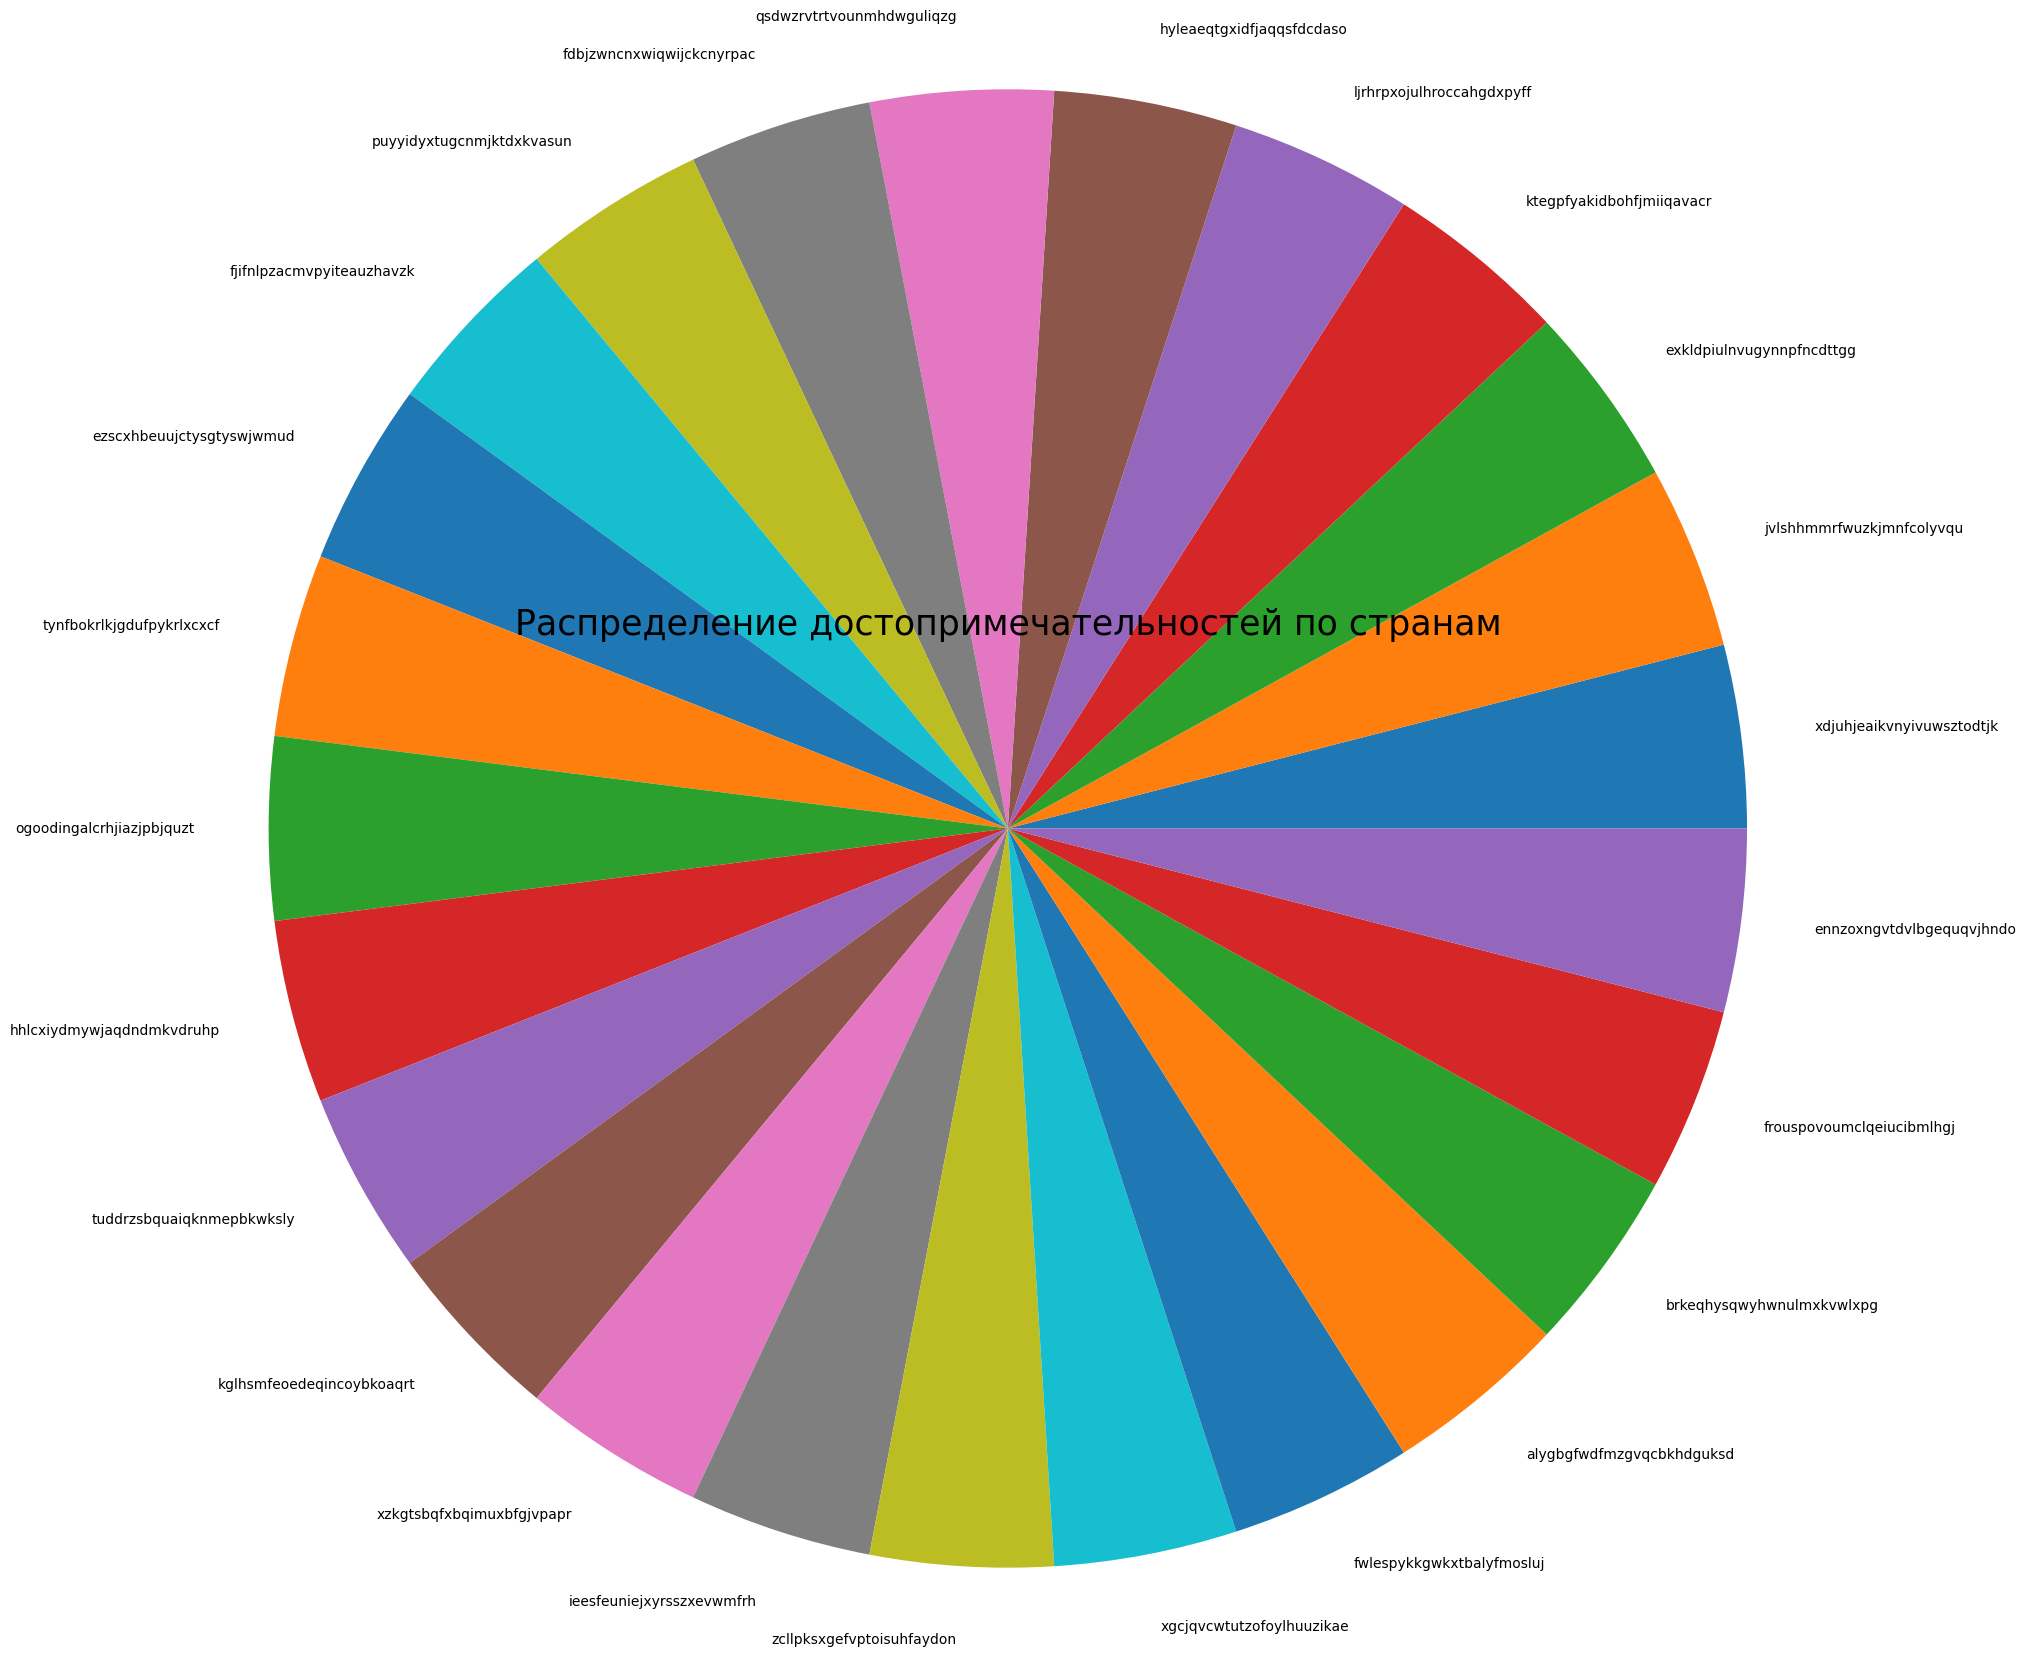

In [40]:
plt.pie(
  frame.percentage,
  labels = frame.country,
  radius=5
)
plt.title('Распределение достопримечательностей по странам', fontsize = 25)

In [41]:
frame = pd.read_sql_query('''  with list as (select l.country, s.id
from project.sights s
join project.location l
on s.id = l.id
where s.id in (
  select id 
  from project.general_information gi 
  where gi.close_time > '22:00:00+03'
))
select country, count(*) as amount
from list
group by country
limit 25
''',con=connection)

/tmp/ipykernel_15606/3126389708.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frame = pd.read_sql_query('''  with list as (select l.country, s.id


Text(0.5, 1.0, 'Распределение достопримечательностей, работающих после 22:00 по странам')

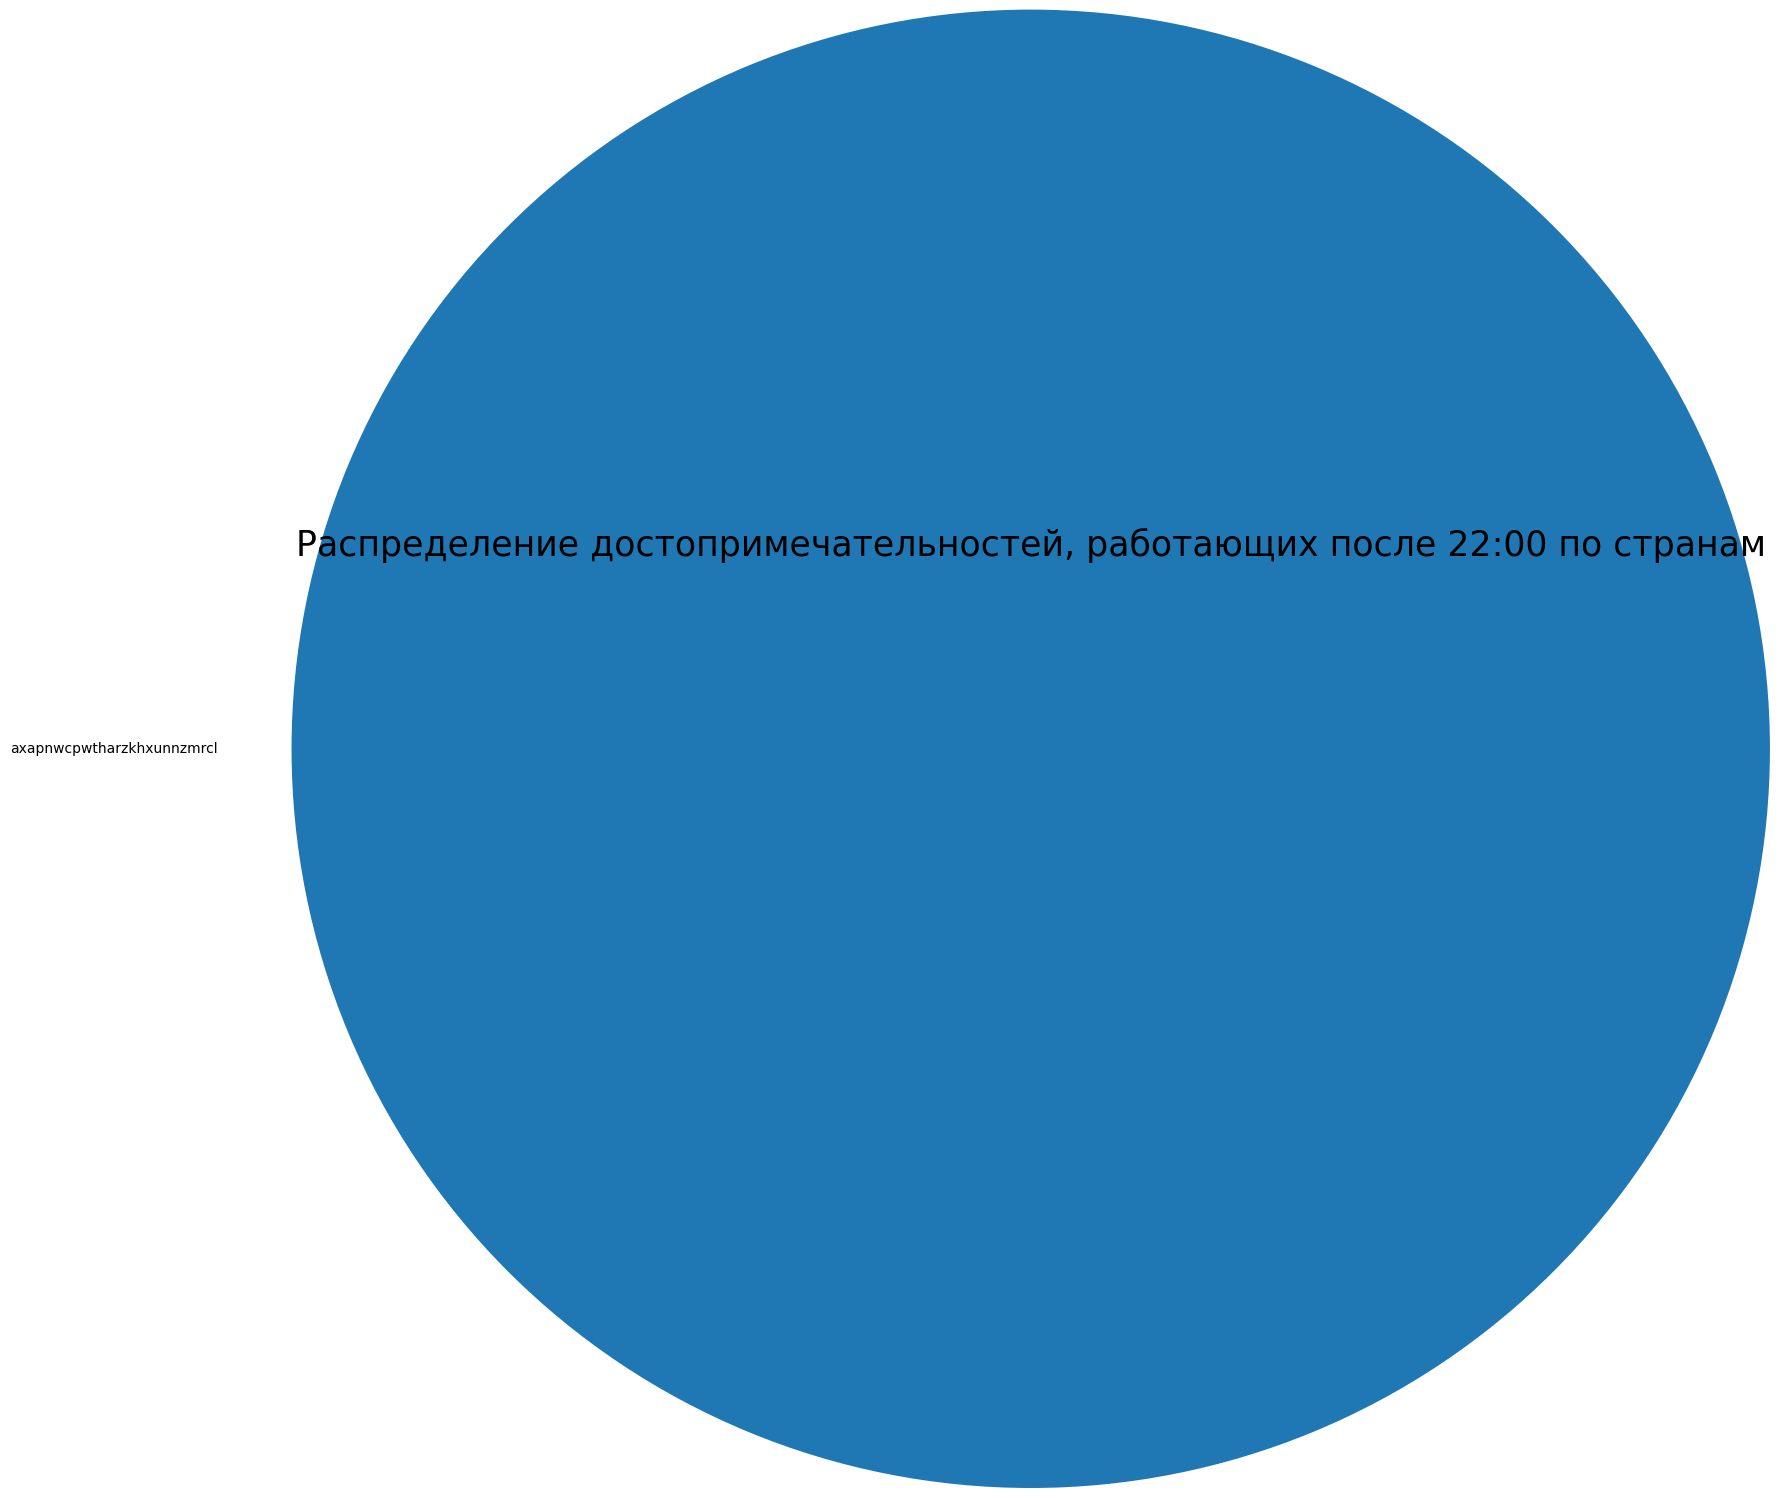

In [42]:
plt.pie(
  frame.amount,
  labels = frame.country,
  radius=5
)
plt.title('Распределение достопримечательностей, работающих после 22:00 по странам', fontsize = 25)

In [43]:
frame = pd.read_sql_query('''  with list as (select g.ticket_cost, l.country
from project.general_information g
join project.location l
on g.id = l.id)
select country, count(ticket_cost) as amount
from list
group by country
''',con=connection)

/tmp/ipykernel_15606/1162221699.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frame = pd.read_sql_query('''  with list as (select g.ticket_cost, l.country


Text(0.5, 1.0, 'Распределение затрат на билеты на все достопримечательности всех стран')

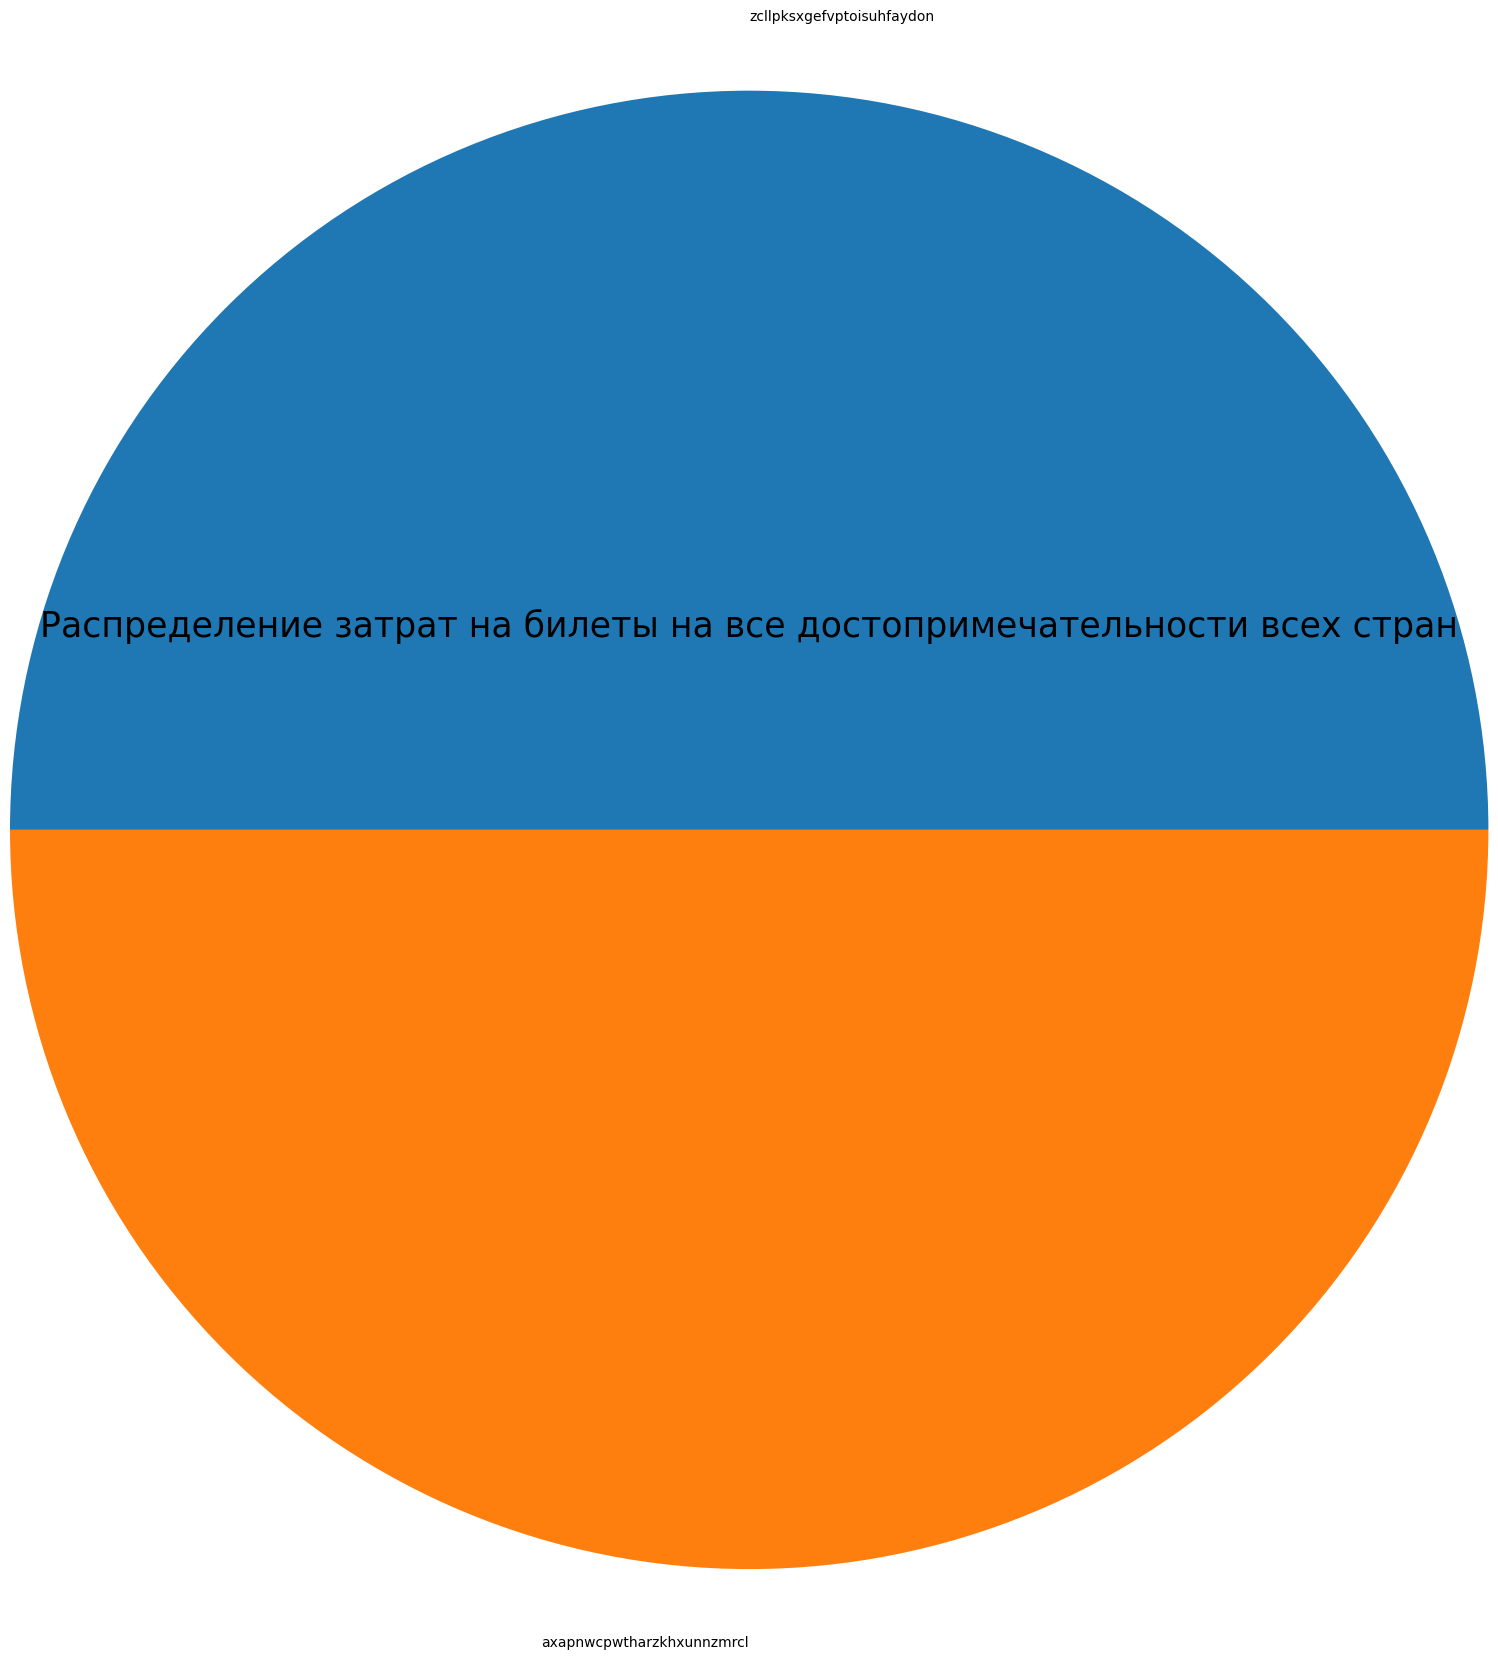

In [45]:
plt.pie(
  frame.amount,
  labels = frame.country,
  radius=5
)
plt.title('Распределение затрат на билеты на все достопримечательности всех стран', fontsize = 25)